In [2]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random


Using TensorFlow backend.


In [3]:
np.random.seed(0)

In [8]:
from keras.datasets import fashion_mnist

In [9]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 2s 0us/step


In [10]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [11]:

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [12]:
X_train = X_train/255
X_test = X_test/255

In [13]:
num_pixels = 784

In [14]:
X_train = X_train.reshape(X_train.shape[0], 784)
X_test = X_test.reshape(X_test.shape[0], 784)

In [112]:
num_classes = 10
def create_model():
    model = Sequential()
    model.add(Dense(num_pixels, input_dim = num_pixels, activation = 'relu'))
    model.add(Dense(num_pixels, activation = 'relu'))
    model.add(Dense(num_classes, activation = 'softmax'))
    model.compile(Adam(lr = 0.01), loss = 'categorical_crossentropy', metrics =['accuracy'])
    return model

In [113]:
model = create_model()
print(model.summary())


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 784)               615440    
_________________________________________________________________
dense_27 (Dense)             (None, 784)               615440    
_________________________________________________________________
dense_28 (Dense)             (None, 10)                7850      
Total params: 1,238,730
Trainable params: 1,238,730
Non-trainable params: 0
_________________________________________________________________
None


In [114]:
history = model.fit(X_train, y_train, validation_split = 0.1, epochs = 10, batch_size = 200, verbose = 1, shuffle =1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 10s 190us/step - loss: 0.7501 - accuracy: 0.7896 - val_loss: 0.4153 - val_accuracy: 0.8483
Epoch 2/10
54000/54000 [==============================] - 10s 188us/step - loss: 0.4104 - accuracy: 0.8510 - val_loss: 0.3924 - val_accuracy: 0.8528
Epoch 3/10
54000/54000 [==============================] - 10s 190us/step - loss: 0.3827 - accuracy: 0.8615 - val_loss: 0.3869 - val_accuracy: 0.8618
Epoch 4/10
54000/54000 [==============================] - 10s 191us/step - loss: 0.3582 - accuracy: 0.8688 - val_loss: 0.3825 - val_accuracy: 0.8618
Epoch 5/10
54000/54000 [==============================] - 11s 200us/step - loss: 0.3531 - accuracy: 0.8714 - val_loss: 0.3937 - val_accuracy: 0.8523
Epoch 6/10
54000/54000 [==============================] - 11s 195us/step - loss: 0.3441 - accuracy: 0.8743 - val_loss: 0.4347 - val_accuracy: 0.8408
Epoch 7/10
54000/54000 [==============================] -

In [115]:
score = model.evaluate(X_test, y_test, verbose = 0)
print(type(score))
print('Test Score:', score[0])
print(['Test Accuracy:', score[1]])

<class 'list'>
Test Score: 0.4066609561800957
['Test Accuracy:', 0.8689000010490417]


In [55]:
import cv2

In [56]:
from PIL import Image

In [57]:
import imageio

In [123]:
im=imageio.imread("c.jpg")

In [124]:
im = cv2.resize(im, (28, 28))
im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

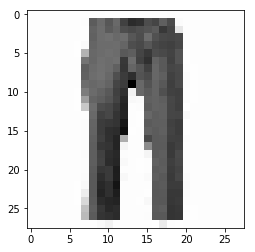

In [125]:
plt.imshow(im, cmap = 'gray')

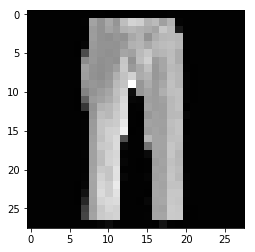

In [126]:
image = cv2.bitwise_not(im)
plt.imshow(image, cmap = 'gray')

In [127]:
image = image/255
image = image.reshape(1, 784)

In [128]:
prediction = model.predict_classes(image)
print(str(prediction))

[1]
